In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def rabi_frequency(As, K_, K_p, chi_s, n, chi_c):
    gamma_p = K_+K_p
    nomi = As*(6*K_*K_p*chi_s+K_**2*(-n+chi_s)+K_p**2*(n+chi_s))
    A = -2*(2*K_**2+(n+chi_s)**2)/(4*K_)+2*(2*K_p**2+(n-chi_s)**2)/(4*K_p)
    denomi = 8*K_*K_p*gamma_p*np.sqrt(1+4*chi_c**2/(A)**2)
    return nomi/(denomi)

def K(tc, epsion, g, mu, B):
    Ez = g*mu*B
    return np.sqrt(tc**2+epsion**2/4)+ Ez/2, np.sqrt(tc**2+epsion**2/4) - Ez/2

def w0_func(chi_input, tc,n, epsion, g, mu, B):
    K_p, K_ = K(tc, epsion, g, mu, B)
    chi_s, chi_c = Chi(chi_input, tc, epsion)
    gamma_ = K_-K_p
    w0 = np.sqrt(4*chi_c**2+1/4*(2*gamma_-(n-chi_s)**2/K_p+(n+chi_s)**2/K_)**2)
    return w0

def Chi(chi_input, tc, epsion):
    phi = np.arctan2(2*tc, epsion)
    return np.sin(phi)*chi_input, np.cos(phi)*chi_input

def rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B):

    phi = np.arctan2(2*tc, epsion)
    K_p, K_ = K(tc, epsion, g, mu, B)
    chi_s, chi_c = Chi(chi_input, tc, epsion)
    As = drive * np.sin(phi)
    print(As)

    rabi_0 = rabi_frequency(As, K_, K_p, chi_s, n, chi_c)
    w0 = w0_func(chi_input, tc,n, epsion, g, mu, B)
    print(drive_frequency-w0)
    return np.sqrt(rabi_0**2+(drive_frequency-w0)**2)


def rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B):

    phi = np.arctan2(2*tc, epsion)
    ###energy level
    Ez = g*mu*B
    K_p = np.sqrt(tc**2+epsion**2/4)+ Ez/2
    K_ = np.sqrt(tc**2+epsion**2/4) - Ez/2
    chi_s = np.sin(phi)*chi_input
    chi_c = np.cos(phi)*chi_input

    As = drive * np.sin(phi)
    ####compute rabi frequency
    gamma_p = K_+K_p
    nomi = As*(6*K_*K_p*chi_s+K_**2*(-n+chi_s)+K_p**2*(n+chi_s))
    A = -2*(2*K_**2+(n+chi_s)**2)/(4*K_)+2*(2*K_p**2+(n-chi_s)**2)/(4*K_p)
    denomi = 8*K_*K_p*gamma_p*np.sqrt(1+4*chi_c**2/(A)**2)
    rabi_0 = nomi/denomi

    w0 = w0_func(chi_input, tc,n, epsion, g, mu, B)
    print(drive_frequency-w0)
    return np.sqrt(rabi_0**2+(drive_frequency-w0)**2)

In [37]:
def plot(X, Y, Z,
                 cmap='viridis',
                 levels=15,
                 figsize=(6, 5),
                 xlabel=r'$\epsilon_0\ [\mathrm{\mu eV}]$',
                 ylabel=r'$\omega_d\ [\mathrm{\mu eV}]$',
                 cbar_label=r'$\rho(\epsilon_0, \omega_d)$'):
    """
    Plot a 2D density field Z(X,Y) with a khaki-inspired style:
     - discrete filled contour levels
     - overlaid contour lines
     - figure and axes background set to khaki
     - clean colorbar
    """
    # Set up figure with khaki background
    fig, ax = plt.subplots(figsize=figsize, facecolor='white')
    ax.set_facecolor('white')

    # Determine contour levels
    vmin, vmax = Z.min(), Z.max()
    levels_array = np.linspace(vmin, vmax, levels)

    # Filled contour density plot
    cf = ax.contourf(
        X, Y, Z,
        levels=levels_array,
        cmap=cmap,
        extend='both',
        antialiased=True
    )

    # Overlay contour lines
    cs = ax.contour(
        X, Y, Z,
        levels=levels_array,
        colors='k',
        linewidths=0.5
    )

    ax.clabel(cs, fmt='%.1e', fontsize=8)

    # Axes labels
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Colorbar with khaki frame
    cbar = fig.colorbar(
        cf, ax=ax,
        orientation='vertical',
        fraction=0.046, pad=0.04,
        ticks=np.linspace(vmin, vmax, 7)
    )
    cbar.set_label(cbar_label)
    cbar.outline.set_edgecolor('gray')
    cbar.ax.yaxis.set_tick_params(color='gray')
    plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='gray')

    # Final layout and show
    plt.tight_layout()
    plt.show()

def plot_overlay(X, Y, Z,x_1d, Z_1d,Z_1d_2,
                       cmap='viridis',
                       levels=15,
                       figsize=(6,5),
                       xlabel=r'$\epsilon_0\ [\mathrm{\mu eV}]$',
                       ylabel=r'$\omega_d\ [\mathrm{\mu eV}]$',
                       cbar_label=r'$\partial_{\epsilon_0}^2\Omega$'):
    """
    Plot a 2D field Z(X,Y) with high contrast:
     - diverging colormap
     - discrete levels
     - overlaid contour lines
     - clean colorbar
    """
    fig, ax = plt.subplots(figsize=figsize)
    # filled contours with N discrete levels
    cf = ax.contourf(X, Y, Z,
                     levels=np.linspace(Z.min(), Z.max(), levels),
                     cmap=cmap,
                     extend='both',
                     antialiased=True)
    # add thin contour lines
    cs = ax.contour(X, Y, Z,
                    levels=np.linspace(Z.min(), Z.max(), levels),
                    colors='k',
                    linewidths=0.5)
    ax.plot(x_1d, Z_1d)
    ax.plot(x_1d, Z_1d_2)
    ax.clabel(cs, fmt='%.1e', fontsize=8)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # colorbar tweaks
    cbar = fig.colorbar(cf, ax=ax,
                        orientation='vertical',
                        fraction=0.046, pad=0.04,
                        ticks=np.linspace(Z.min(), Z.max(), 7))
    cbar.set_label(cbar_label)
    plt.tight_layout()
    plt.show()

In [4]:
tc = 40
A = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.55
B = 0.1
epsilon = np.linspace(-100,100, 100)

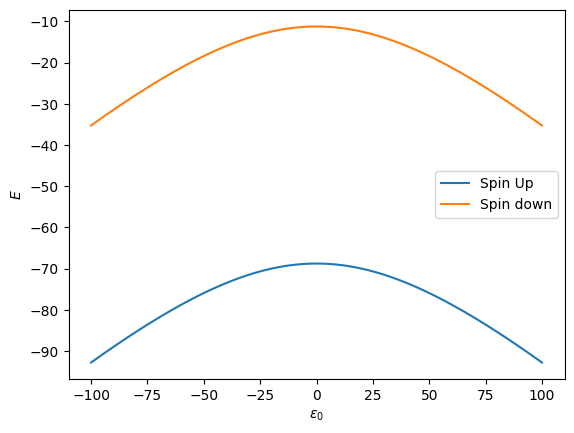

In [5]:
def K(tc, epsion, g, mu, B):
    Ez = g*mu*B
    return np.sqrt(tc**2+epsion**2/4)+ Ez/2, np.sqrt(tc**2+epsion**2/4) - Ez/2
K_, K_p = K(tc, epsilon, g, mu, B)
plt.plot(epsilon, -K_, label='Spin Up')
plt.plot(epsilon, -K_p, label='Spin down')
plt.xlabel(r'$\epsilon_0$')
plt.ylabel(r'$E $')
plt.legend()


# characterize qubits frequency under B = 0.1T as a function of $\epsilon$

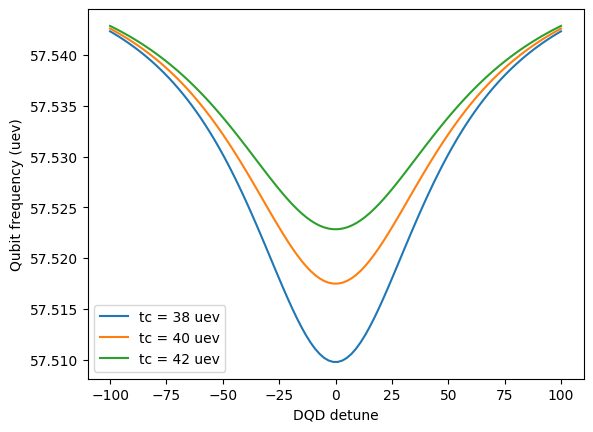

In [6]:
tc = 38
qubit_frequency = w0_func(chi, tc,n, epsilon, g, mu, B)
plt.plot(epsilon, qubit_frequency, label = 'tc = 38 uev')
tc = 40
qubit_frequency = w0_func(chi, tc,n, epsilon, g, mu, B)
plt.plot(epsilon, qubit_frequency, label = 'tc = 40 uev')
tc = 42
qubit_frequency = w0_func(chi, tc,n, epsilon, g, mu, B)
plt.plot(epsilon, qubit_frequency, label = 'tc = 42 uev')

plt.ylabel('Qubit frequency (uev)')
plt.xlabel('DQD detune')
plt.legend()
plt.show()

In [435]:
def rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, resonance = True):

    phi = np.arctan2(2*tc, epsion)
    ###energy level
    Ez = g*mu*B
    K_p = np.sqrt(tc**2+epsion**2/4)+ Ez/2
    K_ = np.sqrt(tc**2+epsion**2/4) - Ez/2
    chi_s = np.sin(phi)*chi_input
    chi_c = np.cos(phi)*chi_input

    As = drive * np.sin(phi)
    ####compute rabi frequency
    gamma_p = K_+K_p
    nomi = As*(6*K_*K_p*chi_s+K_**2*(-n+chi_s)+K_p**2*(n+chi_s))
    A = -2*(2*K_**2+(n+chi_s)**2)/(4*K_)+2*(2*K_p**2+(n-chi_s)**2)/(4*K_p)
    denomi = 8*K_*K_p*gamma_p*np.sqrt(1+4*chi_c**2/(A)**2)
    rabi_0 = nomi/denomi
    gamma_ = K_-K_p
    w0 = np.sqrt(4*chi_c**2+1/4*(2*gamma_-(n-chi_s)**2/K_p+(n+chi_s)**2/K_)**2)
    if not resonance:
        return np.sqrt(rabi_0**2+(drive_frequency-w0)**2)
    if resonance:
        return np.sqrt(rabi_0**2)

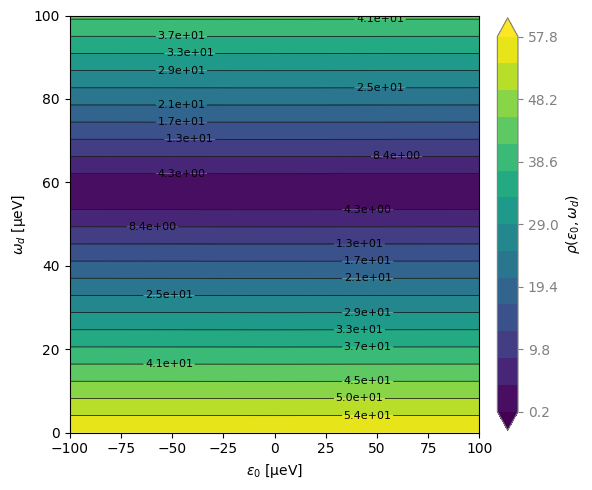

In [436]:
drive = np.linspace(0,100,100)
tc = 40
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
epsilon = np.linspace(-100,100,100)
#tc, drive = np.meshgrid(tc, drive, indexing='ij')
drive, epsilon = np.meshgrid(drive, epsilon)

plot(epsilon, drive, rabi_with_drive(8,drive, chi, tc,n, epsilon, g, mu, B, False))

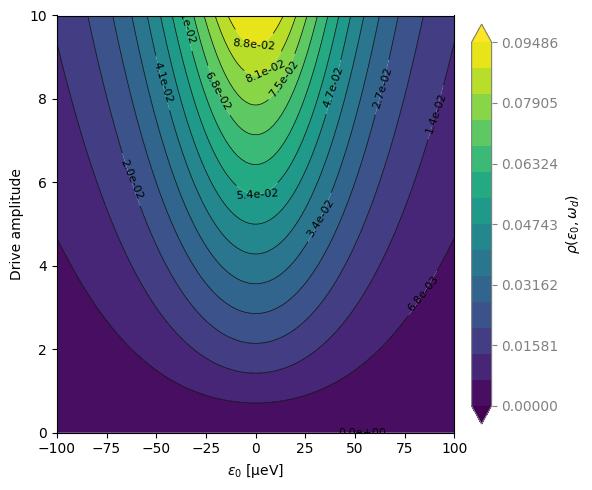

In [437]:
drive = np.linspace(0,10,100)
tc = 40
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
epsilon = np.linspace(-100,100,100)
#tc, drive = np.meshgrid(tc, drive, indexing='ij')
drive, epsilon = np.meshgrid(drive, epsilon)
plot(epsilon, drive, rabi_with_drive(drive,0, chi, tc,n, epsilon, g, mu, B), ylabel = 'Drive amplitude')

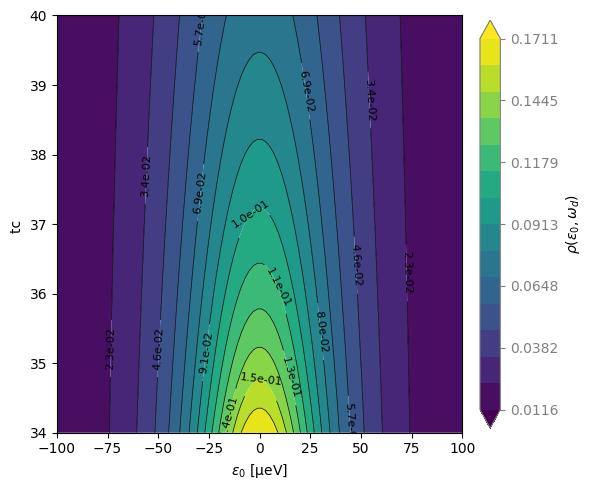

In [438]:
drive = 8
tc = np.linspace(34, 40, 100)
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
epsilon = np.linspace(-100,100,100)
#tc, drive = np.meshgrid(tc, drive, indexing='ij')
w0 = w0_func(chi, tc,n, epsilon, g, mu, B)
tc, epsilon = np.meshgrid(tc, epsilon)
rabi = rabi_with_drive(drive,0, chi, tc,n, epsilon, g, mu, B)
plot(epsilon, tc, rabi, ylabel = 'tc ')

## derivative of rabi

In [439]:
drive_freq = np.linspace(57.4, 58, 100)
epsilon = np.linspace(-100,100,100)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
rabi = rabi_with_drive(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, False)
rabi_first_derivative = np.gradient(rabi,1,1)
rabi_second_derivative = np.gradient(rabi_first_derivative[1],1,1)

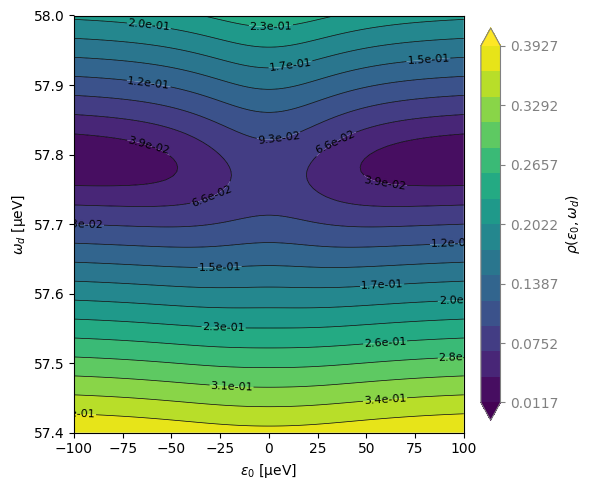

In [332]:
plot(epsilon, drive_freq, rabi)

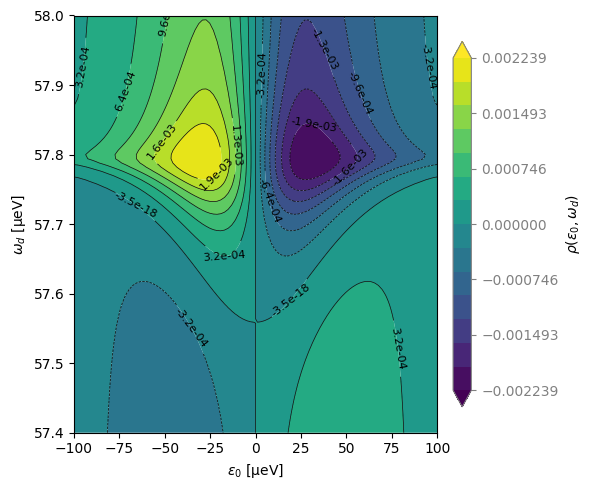

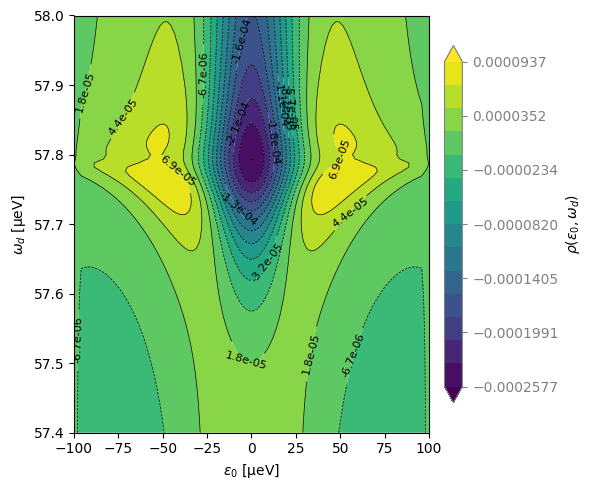

In [333]:
plot(epsilon, drive_freq, rabi_first_derivative[1])
plot(epsilon, drive_freq, rabi_second_derivative[1])

In [334]:
drive_freq = np.linspace(17.2, 17.45, 100)
epsilon = np.linspace(-100,100,100)
drive_freq, epsilon = np.meshgrid(drive_freq, epsilon)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.030
rabi = rabi_with_drive(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, False)
rabi_first_derivative = np.gradient(rabi,1,1)
rabi_second_derivative = np.gradient(rabi_first_derivative[0],1,1)

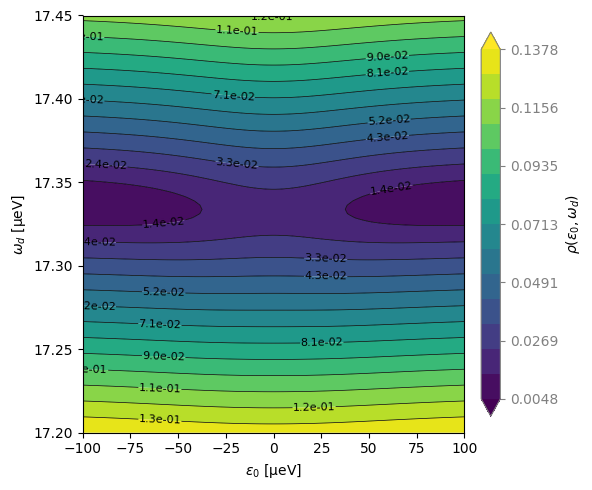

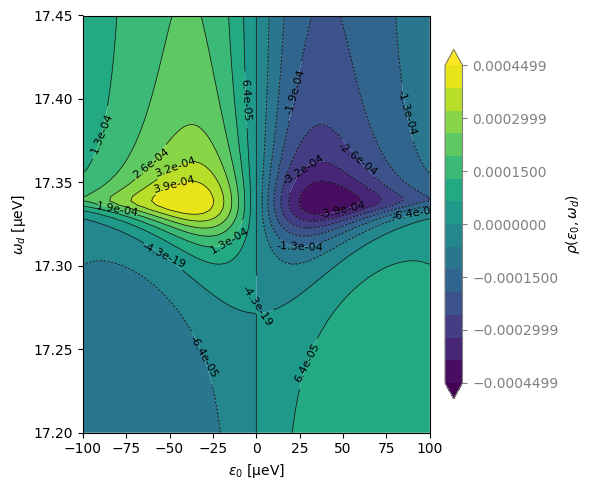

In [335]:
plot(epsilon, drive_freq, rabi)
plot(epsilon, drive_freq, rabi_first_derivative[0])

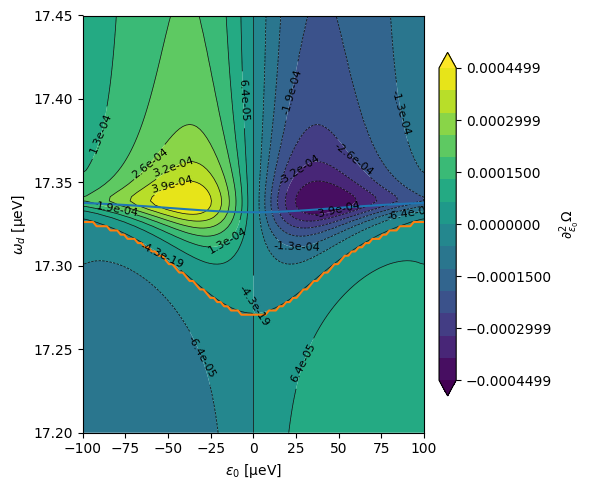

In [336]:
w0 = w0_func(chi, tc,n, epsilon[:,0], g, mu, B)
##find the zero point of first derivative
wd = []

for i in range(len(rabi_first_derivative[0])):
    temp_index = np.where(rabi_first_derivative[0][i][:-1] * rabi_first_derivative[0][i][1:]<0)[0]
    wd.append(drive_freq[0][temp_index])
plot_overlay(epsilon, drive_freq, rabi_first_derivative[0],epsilon[:,0], w0, wd)


In [440]:
drive_freq = np.linspace(57.4, 57.9,100)
epsilon = np.linspace(-100,100,100)
drive_freq, epsilon = np.meshgrid(drive_freq, epsilon)
tc = 40
drive = 8
n = 0.8
chi_input = 0.1
g = 10
mu = 57.8
B = 0.1

rabi = rabi_with_drive(drive,drive_freq, chi, tc,n, epsilon+1.5, g, mu, B, False)
rabi_first_derivative = np.gradient(rabi,1,1)
rabi_second_derivative = np.gradient(rabi_first_derivative[0],1,1)

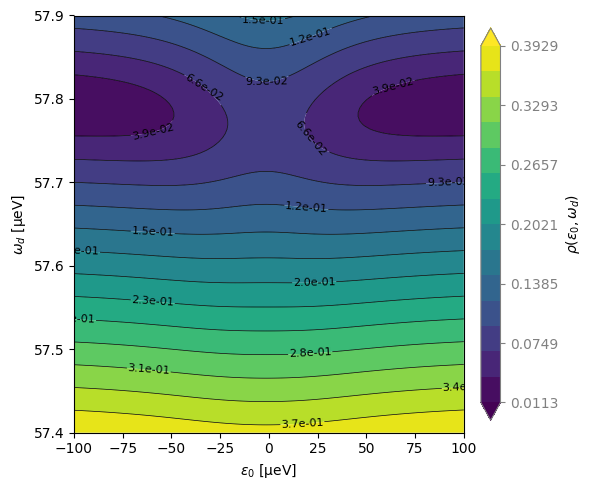

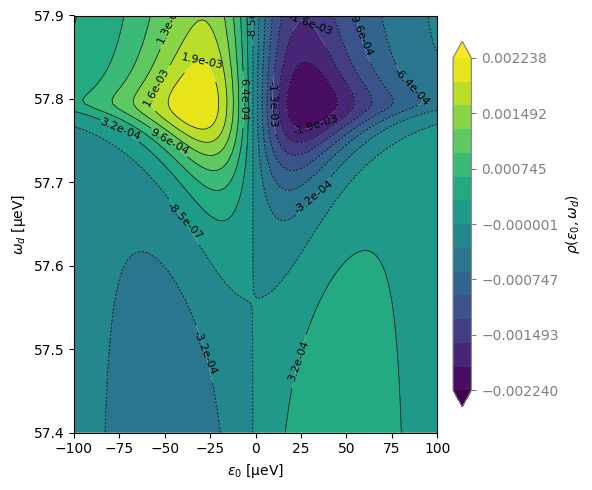

In [441]:
plot(epsilon, drive_freq, rabi)
plot(epsilon, drive_freq, rabi_first_derivative[0])

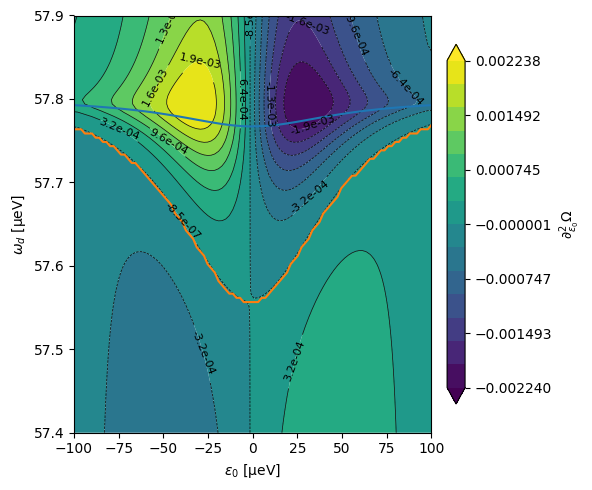

In [442]:
w0 = w0_func(chi, tc,n, epsilon[:,0], g, mu, B)
##find the zero point of first derivative
wd = []

for i in range(len(rabi_first_derivative[0])):
    temp_index = np.where(rabi_first_derivative[0][i][:-1] * rabi_first_derivative[0][i][1:]<0)[0]
    wd.append(drive_freq[0][temp_index])
plot_overlay(epsilon, drive_freq, rabi_first_derivative[0],epsilon[:,0], w0, wd)


### Ok let's check if the rabi frequency change a lot after I vary the detune, or and drive frequency

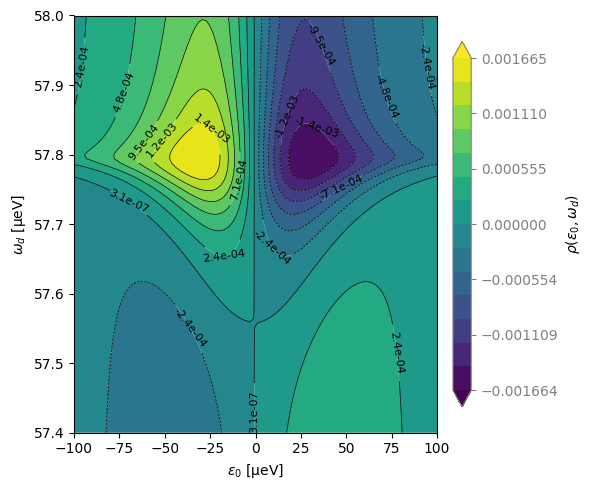

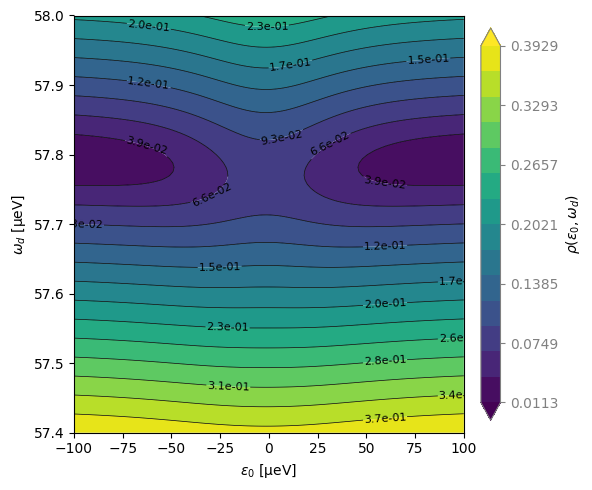

In [198]:
drive_freq = np.linspace(57.4, 58, 100)
epsilon = np.linspace(-100,100,100)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
rabi = rabi_with_drive(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, False)
rabi_first_derivative = np.gradient(rabi,1,1)
rabi_second_derivative = np.gradient(rabi_first_derivative[1],1,1)

drive_freq = np.linspace(57.4, 58, 100)
epsilon = np.linspace(-100,100,100)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
rabi_2 = rabi_with_drive(drive,drive_freq, chi, tc,n, epsilon+1.5, g, mu, B, False)
rabi_first_derivative_2 = np.gradient(rabi,1,1)
rabi_second_derivative_2 = np.gradient(rabi_first_derivative[1],1,1)

plot(epsilon, drive_freq, rabi_2-rabi)
plot(epsilon, drive_freq, rabi_2)

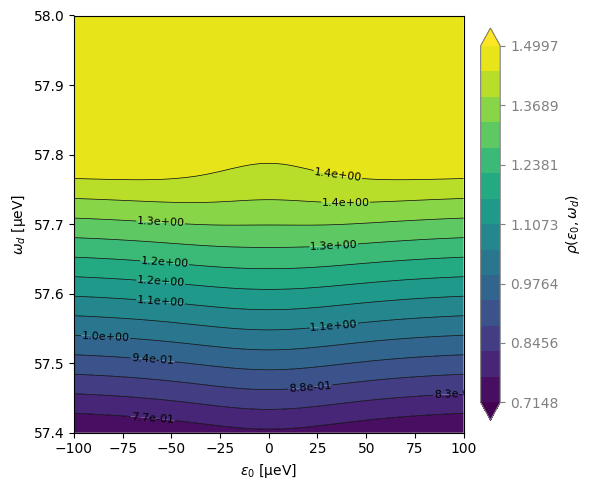

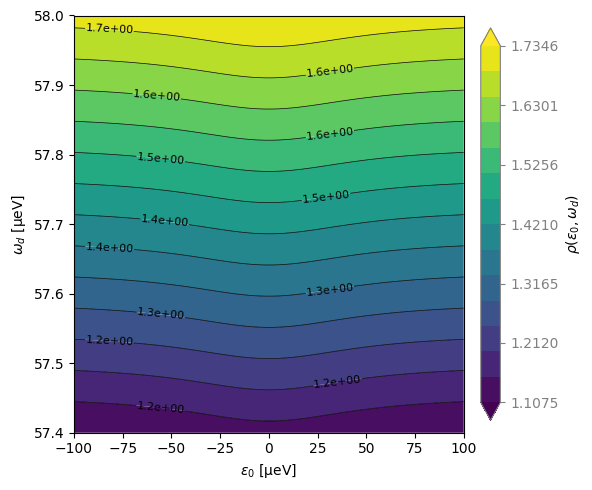

In [199]:
drive_freq = np.linspace(57.4, 58, 100)
epsilon = np.linspace(-100,100,100)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
rabi = rabi_with_drive(drive,drive_freq, chi, tc,n, epsilon, g, mu, B, False)
rabi_first_derivative = np.gradient(rabi,1,1)
rabi_second_derivative = np.gradient(rabi_first_derivative[1],1,1)

drive_freq = np.linspace(57.4, 58, 100)
epsilon = np.linspace(-100,100,100)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
tc = 40
drive = 8
n = 0.8
chi = 0.1
g = 10
mu = 57.8
B = 0.1
rabi_2 = rabi_with_drive(drive,drive_freq+1.5, chi, tc,n, epsilon, g, mu, B, False)
rabi_first_derivative_2 = np.gradient(rabi,1,1)
rabi_second_derivative_2 = np.gradient(rabi_first_derivative[1],1,1)

plot(epsilon, drive_freq, rabi_2-rabi)
plot(epsilon, drive_freq, rabi_2)

## ok let's introduce the bloch vector

In [171]:
def rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, resonance = True):

    phi = np.arctan2(2*tc, epsion)
    ###energy level
    Ez = g*mu*B
    K_p = np.sqrt(tc**2+epsion**2/4) + Ez/2
    K_ = np.sqrt(tc**2+epsion**2/4) - Ez/2
    chi_s = np.sin(phi)*chi_input
    chi_c = np.cos(phi)*chi_input

    As = drive * np.sin(phi)
    ####compute rabi frequency
    gamma_p = K_+K_p
    nomi = As*(6*K_*K_p*chi_s+K_**2*(-n+chi_s)+K_p**2*(n+chi_s))
    A = -2*(2*K_**2+(n+chi_s)**2)/(4*K_)+2*(2*K_p**2+(n-chi_s)**2)/(4*K_p)
    denomi = 8*K_*K_p*gamma_p*np.sqrt(1+4*chi_c**2/(A)**2)
    rabi_0 = nomi/denomi

    gamma_ = K_ - K_p
    w0 = np.sqrt(4*chi_c**2+1/4*(2*gamma_-(n-chi_s)**2/K_p+(n+chi_s)**2/K_)**2)
    if not resonance:
        return np.sqrt(rabi_0**2+(drive_frequency-w0)**2), w0
    if resonance:
        return np.sqrt(rabi_0**2), w0

def evolution(drive, drive_frequency, chi_input, tc, n, epsilon, g, mu, B, noise, sample = 100):
    deltas = np.random.normal(loc=0.0, scale=noise, size=sample)
    average_fidelity = []
    for delta in deltas:
        rabi_off_resonance, w0_off_resonance = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsilon, g, mu, B, False)
        rabi_off_resonance_real, w0_off_resonance_real = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsilon+delta, g, mu, B, False)
        rabi_resonance, w0_resonance = rabi_with_drive(drive, drive_frequency, chi_input, tc, n, epsilon, g, mu, B, True)
        rabi_resonance_real, w0_resonance_real = rabi_with_drive(drive, drive_frequency, chi_input, tc, n, epsilon+delta, g, mu, B, True)

        t = np.pi/rabi_off_resonance

        nx_expect = rabi_resonance/rabi_off_resonance
        detune_expect = drive_frequency - w0_off_resonance
        nz_expect = detune_expect/rabi_off_resonance

        nx_real = rabi_resonance_real/rabi_off_resonance_real
        detune_real = drive_frequency - w0_off_resonance_real
        nz_real = detune_real/rabi_off_resonance_real

        element1 = np.cos(rabi_off_resonance*t/2)-1j*nz_expect*np.sin(rabi_off_resonance*t/2)
        element2 = -1j*nx_expect*np.sin(rabi_off_resonance*t/2)
        element3 = -1j*nx_expect*np.sin(rabi_off_resonance*t/2)
        element4 = np.cos(rabi_off_resonance*t/2)+1j*nz_expect*np.sin(rabi_off_resonance*t/2)
        expect_unitary = np.array([[element1, element2],[element3, element4]])

        element1 = np.cos(rabi_off_resonance_real*t/2)-1j*nz_real*np.sin(rabi_off_resonance_real*t/2)
        element2 = -1j*nx_real*np.sin(rabi_off_resonance_real*t/2)
        element3 = -1j*nx_real*np.sin(rabi_off_resonance_real*t/2)
        element4 = np.cos(rabi_off_resonance_real*t/2)+1j*nz_real*np.sin(rabi_off_resonance_real*t/2)
        noise_unitary = np.array([[element1, element2],[element3, element4]])

        final_matrix = expect_unitary.conj().T@noise_unitary
        fedelity = (np.abs(np.trace(final_matrix))**2 + 2)/(2*3)
        average_fidelity.append(fedelity)
    return 1-np.average(np.array(average_fidelity))


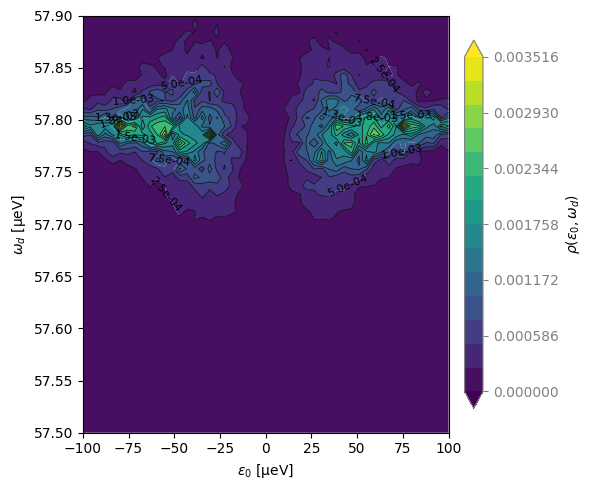

In [172]:
drive_freq = np.linspace(57.5, 57.9,50)
epsilon = np.linspace(-100,100,50)
tc = 40
drive = 8
n = 0.8
chi_input = 0.1
g = 10
mu = 57.8
B = 0.1
noise = 1.5
final_matrix = []
for i in range(len(drive_freq)):
    temp_matrix = []
    for j in range(len(epsilon)):
        temp_matrix.append(evolution(drive, drive_freq[i], chi_input, tc, n, epsilon[j], g, mu, B, noise, 30))
    final_matrix.append(temp_matrix)
final_array = np.array(final_matrix)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
plot(epsilon, drive_freq, final_array)

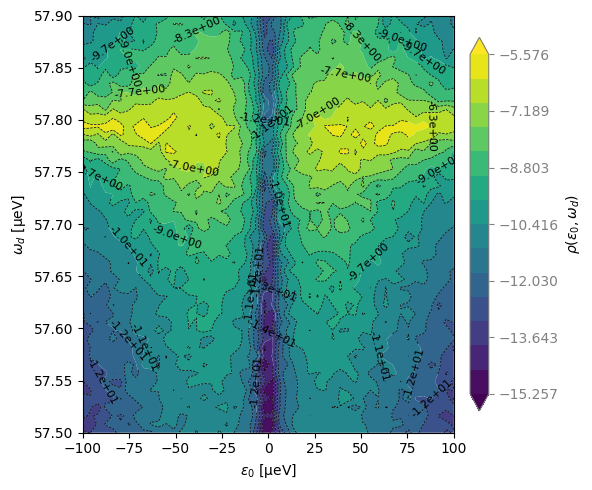

In [124]:
drive_freq = np.linspace(57.5, 57.9,50)
epsilon = np.linspace(-100,100,50)
tc = 40
drive = 8
n = 0.8
chi_input = 0.1
g = 10
mu = 57.8
B = 0.1
noise = 1.5
final_matrix = []
for i in range(len(drive_freq)):
    temp_matrix = []
    for j in range(len(epsilon)):
        temp_matrix.append(evolution(drive, drive_freq[i], chi_input, tc, n, epsilon[j], g, mu, B, noise, 30))
    final_matrix.append(temp_matrix)
final_array = np.array(final_matrix)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
plot(epsilon, drive_freq, np.log(final_array))

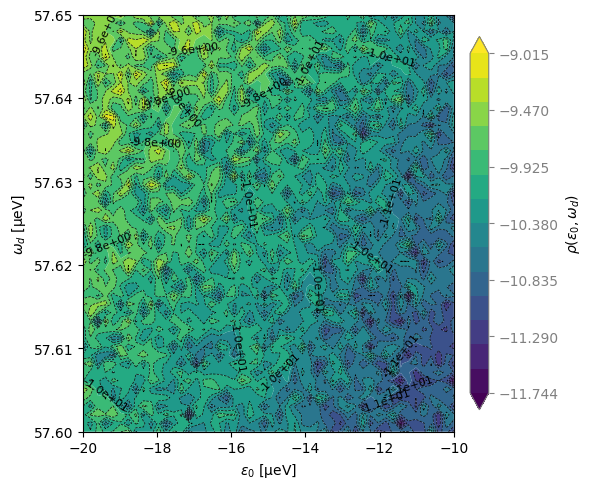

In [125]:
drive_freq = np.linspace(57.6, 57.65,50)
epsilon = np.linspace(-20,-10,50)
tc = 40
drive = 8
n = 0.8
chi_input = 0.1
g = 10
mu = 57.8
B = 0.1
noise = 1.5
final_matrix = []
for i in range(len(drive_freq)):
    temp_matrix = []
    for j in range(len(epsilon)):
        temp_matrix.append(evolution(drive, drive_freq[i], chi_input, tc, n, epsilon[j], g, mu, B, noise, 30))
    final_matrix.append(temp_matrix)
final_array = np.array(final_matrix)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
plot(epsilon, drive_freq, np.log(final_array))

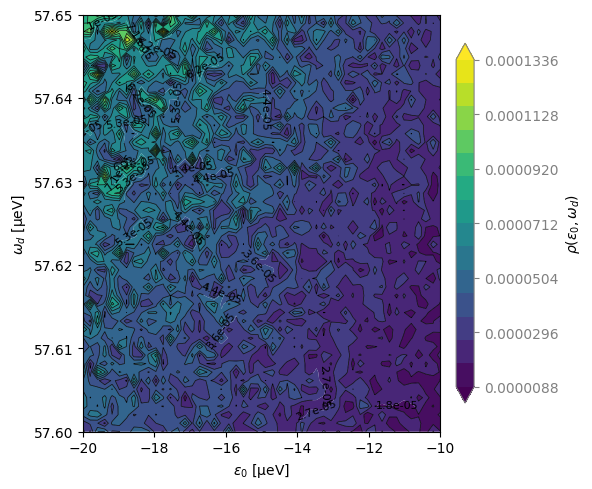

In [126]:
drive_freq = np.linspace(57.6, 57.65,50)
epsilon = np.linspace(-20,-10,50)
tc = 40
drive = 8
n = 0.8
chi_input = 0.1
g = 10
mu = 57.8
B = 0.1
noise = 1.5
final_matrix = []
for i in range(len(drive_freq)):
    temp_matrix = []
    for j in range(len(epsilon)):
        temp_matrix.append(evolution(drive, drive_freq[i], chi_input, tc, n, epsilon[j], g, mu, B, noise, 30))
    final_matrix.append(temp_matrix)
final_array = np.array(final_matrix)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
plot(epsilon, drive_freq, final_array)

OK now let's batch average the fidelity

In [631]:
def rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, resonance = True):

    phi = np.arctan2(2*tc, epsion)
    ###energy level
    Ez = g*mu*B
    K_p = np.sqrt(tc**2+epsion**2/4)+ Ez/2
    K_ = np.sqrt(tc**2+epsion**2/4) - Ez/2
    chi_s = np.sin(phi)*chi_input
    chi_c = np.cos(phi)*chi_input

    As = drive * np.sin(phi)
    ####compute rabi frequency
    gamma_p = K_+K_p
    nomi = As*(6*K_*K_p*chi_s+K_**2*(-n+chi_s)+K_p**2*(n+chi_s))
    A = -2*(2*K_**2+(n+chi_s)**2)/(4*K_)+2*(2*K_p**2+(n-chi_s)**2)/(4*K_p)
    denomi = 8*K_*K_p*gamma_p*np.sqrt(1+4*chi_c**2/(A)**2)
    rabi_0 = nomi/denomi

    gamma_ = K_ - K_p
    w0 = np.sqrt(4*chi_c**2+1/4*(2*gamma_-(n-chi_s)**2/K_p+(n+chi_s)**2/K_)**2)
    if not resonance:
        return np.sqrt(rabi_0**2+(drive_frequency-w0)**2), w0
    elif resonance:
        return np.sqrt(rabi_0**2), w0

def evolution(drive, drive_frequency, chi_input, tc, n, epsilon, g, mu, B, noise):
    rabi_off_resonance, w0_off_resonance = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsilon, g, mu, B, False)
    rabi_off_resonance_real, w0_off_resonance_real = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsilon+noise, g, mu, B, False)

    #t = np.pi/rabi_resonance/1.5
    detune_expect = drive_frequency - w0_off_resonance
    t = np.pi/np.sqrt(rabi_off_resonance**2-detune_expect**2)
    #t = np.pi/rabi_off_resonance
    nz_expect = detune_expect/rabi_off_resonance

    detune_real = drive_frequency - w0_off_resonance_real
    nz_real = detune_real/rabi_off_resonance_real

    element1 = np.cos(rabi_off_resonance*t/2)-1j*nz_expect*np.sin(rabi_off_resonance*t/2)
    element2 = -1j*np.sqrt(1-nz_expect**2)*np.sin(rabi_off_resonance*t/2)
    element3 = element2
    element4 = np.cos(rabi_off_resonance*t/2)+1j*nz_expect*np.sin(rabi_off_resonance*t/2)
    expect_unitary = np.array([[element1, element2],
                               [element3, element4]])

    element1 = np.cos(rabi_off_resonance_real*t/2)-1j*nz_real*np.sin(rabi_off_resonance_real*t/2)
    element2 = -1j*np.sqrt(1-nz_real**2)*np.sin(rabi_off_resonance_real*t/2)
    element3 = element2
    element4 = np.cos(rabi_off_resonance_real*t/2)+1j*nz_real*np.sin(rabi_off_resonance_real*t/2)
    noise_unitary = np.array([[element1, element2],
                              [element3, element4]])

    final_matrix = np.matmul(expect_unitary.conj().T, noise_unitary)
    trace = np.trace(final_matrix)
    trace = np.abs(trace)
    fedelity = (trace**2 + 2)/(2*3)
    return fedelity

def sample_average(drive, drive_freq, chi_input, tc, n, epsilon, g, mu, B, noise, Nsamples=10):
    deltas = np.random.normal(loc=0.0, scale=noise, size=Nsamples)
    sample_matrix = []
    for delta in deltas:
        final_matrix = []
        for i in range(len(drive_freq)):
            temp_matrix = []
            for j in range(len(epsilon)):
                temp_matrix.append(evolution(drive, drive_freq[i], chi_input, tc, n, epsilon[j], g, mu, B, delta))
            final_matrix.append(temp_matrix)
        final_array = np.array(final_matrix)
        sample_matrix.append(final_array)
    #epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
    sample_array = np.array(sample_matrix)
    #for i in range(len(sample_array)):
    #   plot(epsilon, drive_freq, sample_array[i])
    return np.average(sample_array, axis = 0)

In [632]:
drive_freq = np.linspace(57.4, 57.9,100)
epsilon = np.linspace(-100,100,100)
tc = 40
drive = 8
n = 0.8
chi_input = 0.1
g = 10
mu = 57.8
B = 0.1
noise = 1.5
fidelity = sample_average(drive, drive_freq, chi_input, tc, n, epsilon, g, mu, B, noise, 10)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
infidelity = 1-fidelity

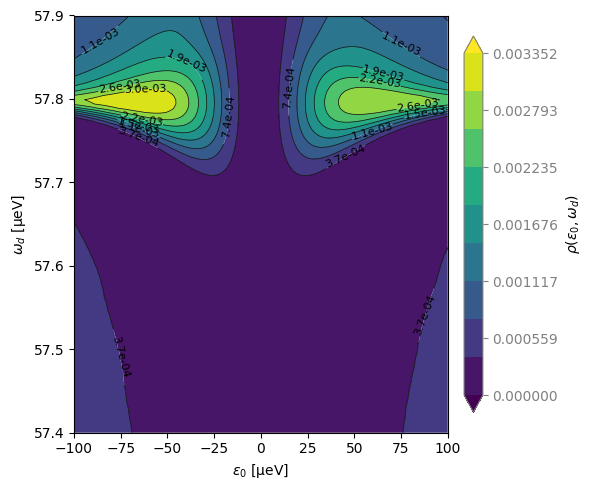

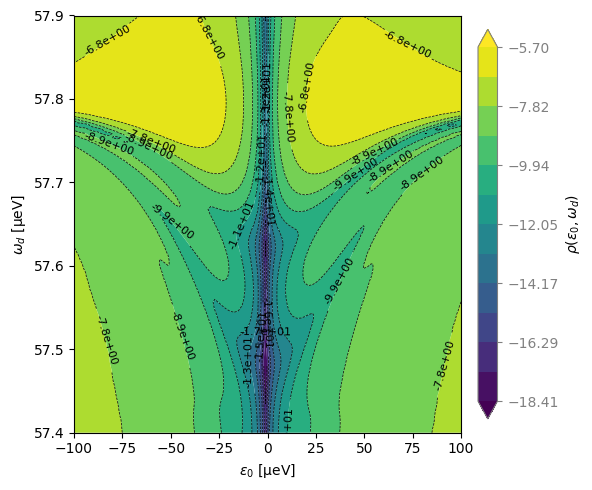

In [633]:
plot(epsilon, drive_freq, infidelity, levels = 10)
plot(epsilon, drive_freq, np.log(infidelity), levels = 13)

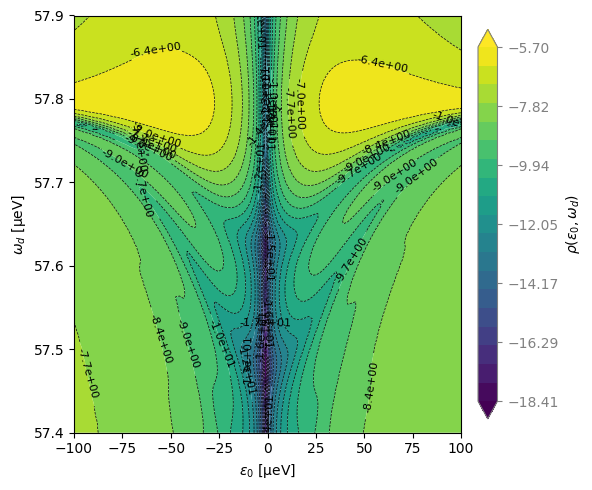

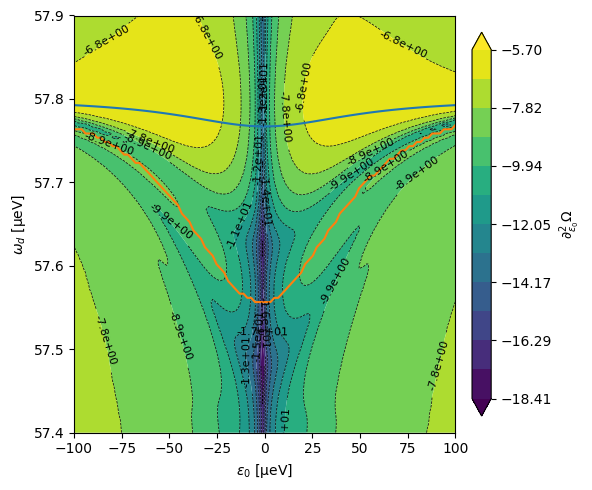

57.55656565656565


In [634]:
w0 = w0_func(chi, tc,n, epsilon[0], g, mu, B)
##find the zero point of first derivative
plot(epsilon, drive_freq, np.log(infidelity), levels = 20)
plot_overlay(epsilon, drive_freq, np.log(infidelity),epsilon[0], w0, wd, levels = 13)
print(np.min(wd))


In [546]:
drive_freq = np.linspace(57.4, 57.9,100)
epsilon = np.linspace(-100,100,100)
tc = 40
drive = 8
n = 0.8
chi_input = 0.1
g = 10
mu = 57.8
B = 0.1
noise = 1.5
fidelity = sample_average(drive, drive_freq, chi_input, tc, n, epsilon, g, mu, B, noise, 3)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
infidelity = 1-fidelity

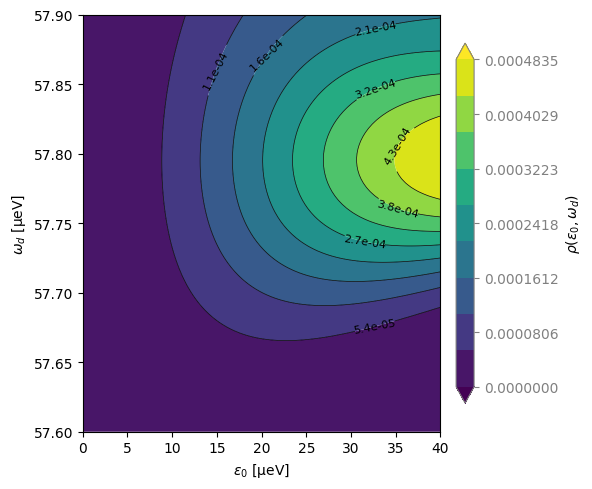

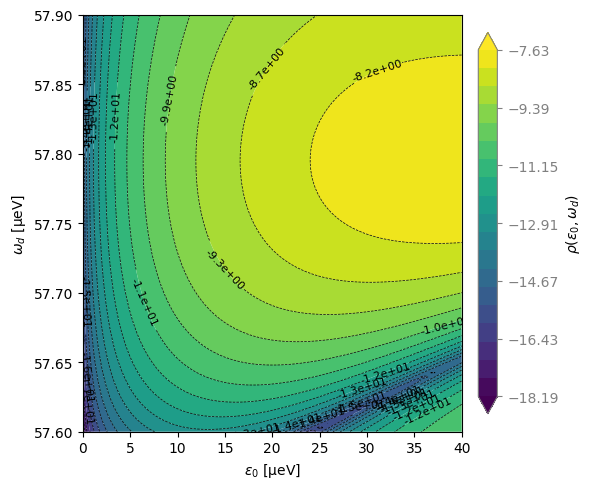

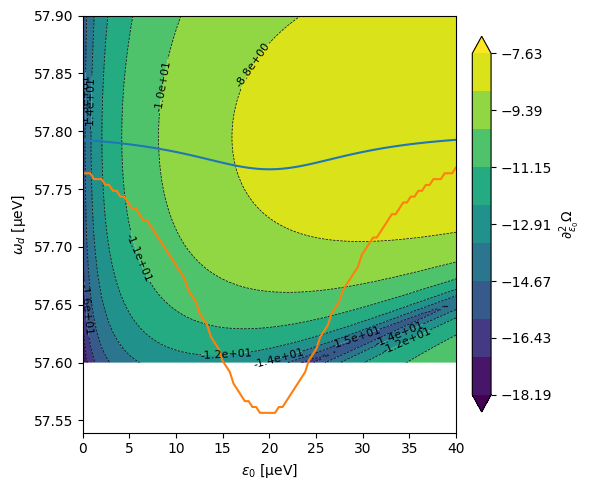

In [571]:
plot(epsilon, drive_freq, infidelity, levels = 10)
plot(epsilon, drive_freq, np.log(infidelity), levels = 20)
plot_overlay(epsilon, drive_freq, np.log(infidelity),epsilon[0], w0, wd, levels = 10)

In [569]:
drive_freq = np.linspace(57.6, 57.9,100)
epsilon = np.linspace(0,40,100)
tc = 40
drive = 8
n = 0.8
chi_input = 0.1
g = 10
mu = 57.8
B = 0.1
noise = 1.5

fidelity = sample_average(drive, drive_freq, chi_input, tc, n, epsilon, g, mu, B, noise, 3)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
infidelity = 1-fidelity


drive_freq = np.linspace(57.6, 57.9,100)
epsilon = np.linspace(0,40,100)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
rabi, _ = rabi_with_drive(drive, drive_freq, chi_input, tc, n, epsilon, g, mu, B, False)
rabi_first_derivative = np.gradient(rabi,1,1)
rabi_second_derivative = np.gradient(rabi_first_derivative[1],1,1)


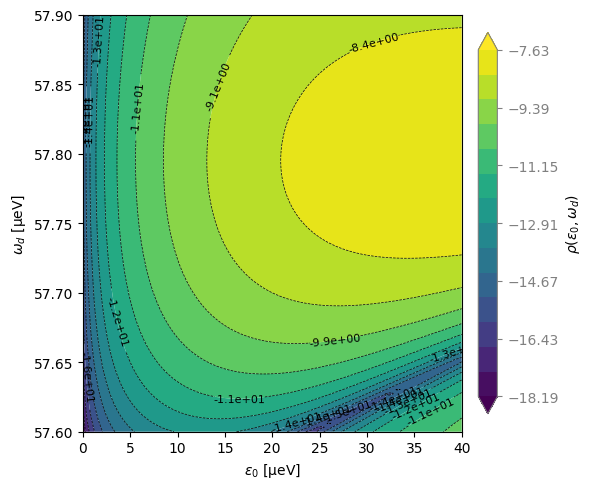

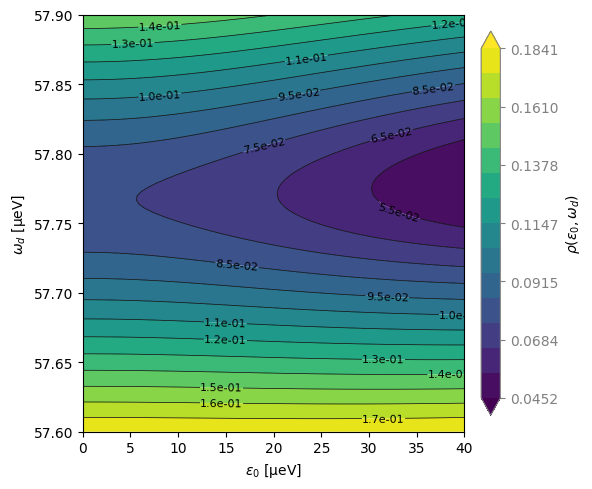

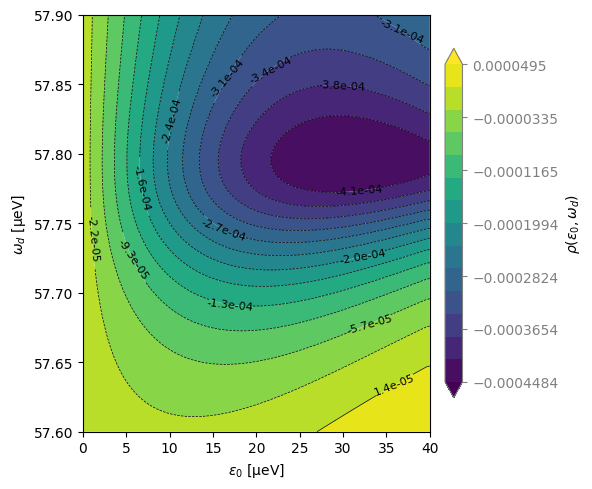

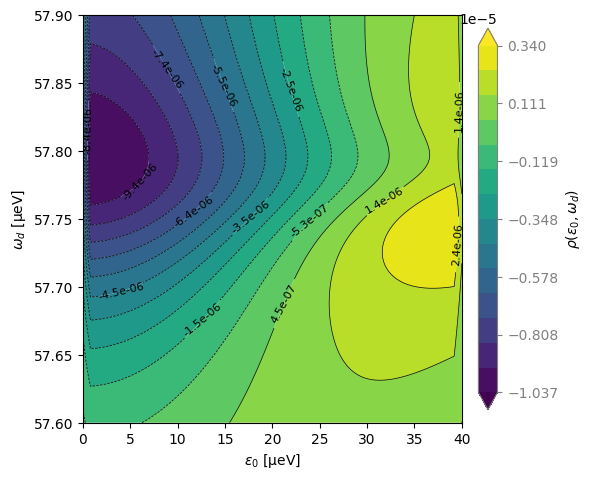

In [570]:
plot(epsilon, drive_freq, np.log(infidelity))
plot(epsilon, drive_freq, rabi)
plot(epsilon, drive_freq, rabi_first_derivative[1])
plot(epsilon, drive_freq, rabi_second_derivative[1])

In [430]:
levels = 7

In [431]:
def rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsion, g, mu, B, resonance = True):

    phi = np.arctan2(2*tc, epsion)
    ###energy level
    Ez = g*mu*B
    K_p = np.sqrt(tc**2+epsion**2/4)+ Ez/2
    K_ = np.sqrt(tc**2+epsion**2/4) - Ez/2
    chi_s = np.sin(phi)*chi_input
    chi_c = np.cos(phi)*chi_input

    As = drive * np.sin(phi)
    ####compute rabi frequency
    gamma_p = K_+K_p
    nomi = As*(6*K_*K_p*chi_s+K_**2*(-n+chi_s)+K_p**2*(n+chi_s))
    A = -2*(2*K_**2+(n+chi_s)**2)/(4*K_)+2*(2*K_p**2+(n-chi_s)**2)/(4*K_p)
    denomi = 8*K_*K_p*gamma_p*np.sqrt(1+4*chi_c**2/(A)**2)
    rabi_0 = nomi/denomi

    gamma_ = K_ - K_p
    w0 = np.sqrt(4*chi_c**2+1/4*(2*gamma_-(n-chi_s)**2/K_p+(n+chi_s)**2/K_)**2)
    if not resonance:
        return np.sqrt(rabi_0**2+(drive_frequency-w0)**2), w0
    if resonance:
        return np.sqrt(rabi_0**2), w0

def evolution(drive, drive_frequency, chi_input, tc, n, epsilon, g, mu, B, noise):
    rabi_off_resonance, w0_off_resonance = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsilon, g, mu, B, False)
    rabi_off_resonance_real, w0_off_resonance_real = rabi_with_drive(drive,drive_frequency, chi_input, tc,n, epsilon+noise, g, mu, B, False)
    rabi_resonance, w0_resonance = rabi_with_drive(drive, drive_frequency, chi_input, tc, n, epsilon, g, mu, B, True)
    rabi_resonance_real, w0_resonance_real = rabi_with_drive(drive, drive_frequency, chi_input, tc, n, epsilon+noise, g, mu, B, True)

    t = np.pi/rabi_off_resonance

    nx_expect = rabi_resonance/rabi_off_resonance
    detune_expect = drive_frequency - w0_off_resonance
    nz_expect = detune_expect/rabi_off_resonance

    nx_real = rabi_resonance_real/rabi_off_resonance_real
    detune_real = drive_frequency - w0_off_resonance_real
    nz_real = detune_real/rabi_off_resonance_real

    element1 = np.cos(rabi_resonance*t/2)-1j*nz_expect*np.sin(rabi_resonance*t/2)
    element2 = -1j*nx_expect*np.sin(rabi_resonance*t/2)
    element3 = -1j*nx_expect*np.sin(rabi_resonance*t/2)
    element4 = np.cos(rabi_resonance*t/2)+1j*nz_expect*np.sin(rabi_resonance*t/2)
    expect_unitary = np.array([[element1, element2],[element3, element4]])

    element1 = np.cos(rabi_resonance_real*t/2)-1j*nz_real*np.sin(rabi_resonance_real*t/2)
    element2 = -1j*nx_real*np.sin(rabi_resonance_real*t/2)
    element3 = -1j*nx_real*np.sin(rabi_resonance_real*t/2)
    element4 = np.cos(rabi_resonance_real*t/2)+1j*nz_real*np.sin(rabi_resonance_real*t/2)
    noise_unitary = np.array([[element1, element2],[element3, element4]])

    final_matrix = np.matmul(expect_unitary.conj().T, noise_unitary)
    trace = np.trace(final_matrix)
    trace_conj = trace.conj()
    fedelity = (abs(trace*trace_conj) + 2)/(2*3)
    return fedelity

def sample_average(drive, drive_freq, chi_input, tc, n, epsilon, g, mu, B, noise, Nsamples=10):
    deltas = np.random.normal(loc=0.0, scale=noise, size=Nsamples)
    sample_matrix = []
    for delta in deltas:
        final_matrix = []
        for i in range(len(drive_freq)):
            temp_matrix = []
            for j in range(len(epsilon)):
                temp_matrix.append(evolution(drive, drive_freq[i], chi_input, tc, n, epsilon[j], g, mu, B, delta))
            final_matrix.append(temp_matrix)
        final_array = np.array(final_matrix)
        sample_matrix.append(final_array)
    #epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
    sample_array = np.array(sample_matrix)
    #for i in range(len(sample_array)):
    #   plot(epsilon, drive_freq, sample_array[i])
    return np.average(sample_array, axis = 0)

In [432]:
drive_freq = np.linspace(57.4, 57.9,100)
epsilon = np.linspace(-100,100,100)
tc = 40
drive = 8
n = 0.8
chi_input = 0.1
g = 10
mu = 57.8
B = 0.1
noise = 1.5
fidelity = sample_average(drive, drive_freq, chi_input, tc, n, epsilon, g, mu, B, noise, 10)
epsilon, drive_freq = np.meshgrid(epsilon, drive_freq)
infidelity = 1-fidelity

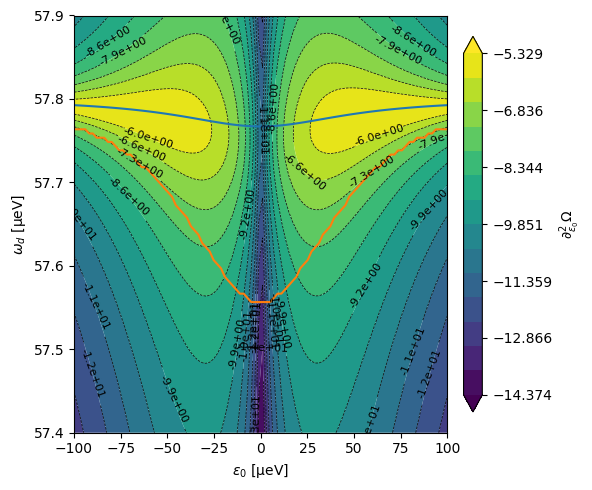

In [433]:
w0 = w0_func(chi, tc,n, epsilon[0], g, mu, B)
##find the zero point of first derivative
plot_overlay(epsilon, drive_freq, np.log(infidelity),epsilon[0], w0, wd)
